In [ ]:
import sys
import os

# Add the parent folder to sys.path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import density_generator
import numpy as np
import matplotlib.pyplot as plt
import qutip
import importlib
import helper_functions
from random import randint
importlib.reload(density_generator)
importlib.reload(helper_functions)

<module 'helper_functions' from '/home/ronin/Dev/space/QFI/helper_functions.py'>

In [28]:
# domande:
# 1) matruce densità è hermitiana?
# 2) matrice densità è semdef positiva?
# 3) matrice densità è traccia 1?

In [ ]:
N = 10
n = 7
ket = qutip.rand_unitary(2**N)[randint(0, N-1),:]
rho = np.outer(ket, np.conj(ket))

print(f"rho shape: {rho.shape}")

trace_out_index= np.random.choice(range(N), size= N-n, replace=False)

print(f"trace_out_index: {trace_out_index}")
# print purity and trace
print(f"purity: {np.trace(rho @ rho)}")
print(f"trace: {np.trace(rho)}")

In [38]:
v = helper_functions.trace_out(
    rho= rho,
    trace_out_index= trace_out_index)# it returns a matrix
v.shape
type(v)
# print purity and trace
print(f"purity: {np.trace(v @ v)}")
print(f"trace: {np.trace(v)}")

purity: (0.13136135336332536+3.070494433796839e-20j)
trace: (0.9999999999999997+3.7761171499907317e-19j)


In [ ]:
print("is posdef? : ", np.all(np.linalg.eigvals(v) >= 0)) ## non posdef!!!
print("is hermitian? :",np.allclose(v, np.conj(v.T))) ## hermitiana)

is posdef? :  False
is hermitian? : True


In [40]:
a_x=1
h_z=0.1
delta=0.01
m=1
trace_out_index=[np.floor(n/2).astype(int)]
trace_out_index=[0]
derivative_delta=None
model = density_generator.IsingQuantumState(
        n=n, a_x=a_x, h_z=h_z, trace_out_index=trace_out_index, initial_state=v, DEBUG=True)

Dimension of the Hilbert space: 128
Initial state type: <class 'numpy.ndarray'> | initial_state: [[ 4.88180636e-03+9.19926970e-21j  9.63953828e-05-5.35045927e-05j
   2.03148894e-03+2.16552308e-03j ...  1.27426329e-03-2.49581019e-03j
  -6.94620223e-04+9.55472638e-04j  1.08131551e-03-1.15832697e-03j]
 [ 9.63953828e-05+5.35045927e-05j  6.56139148e-03+3.27370014e-20j
  -7.88299463e-04-1.47931690e-03j ... -2.15887824e-04+4.83966509e-04j
  -3.07689965e-03+8.23066438e-04j -1.77187790e-03-1.09248366e-03j]
 [ 2.03148894e-03-2.16552308e-03j -7.88299463e-04+1.47931690e-03j
   8.91602430e-03-1.25868926e-20j ... -2.33956936e-03-4.85335835e-04j
   3.03929269e-03-1.61397558e-03j -1.99610604e-04-1.38643485e-03j]
 ...
 [ 1.27426329e-03+2.49581019e-03j -2.15887824e-04-4.83966509e-04j
  -2.33956936e-03+4.85335835e-04j ...  4.03275334e-03-2.25575259e-20j
   1.14418986e-03+7.33251374e-04j  2.63250676e-03+1.23421091e-03j]
 [-6.94620223e-04-9.55472638e-04j -3.07689965e-03-8.23066438e-04j
   3.03929269e-03+1.

In [41]:
print(v.shape)
rho = model.generate_density_matrix()
print(rho.shape)

(128, 128)
(128, 128)


In [42]:
np.log2(rho.shape[0])

7.0

In [43]:
purity = np.trace(rho @ rho)
print(f"purity: {purity}")

purity: (0.13136135336332533+6.541741330763368e-19j)


In [44]:

participation_ratio = 1 / purity
print(f"purity: {purity}")
print("Participation Ratio:", np.real(participation_ratio))

purity: (0.13136135336332533+6.541741330763368e-19j)
Participation Ratio: 7.61258904842548


In [ ]:
iters = 100
pr = np.zeros(iters)
DEBUG = True
N = 10
n = 7

###
a_x=1
h_z=0.1
delta=0.01
m=1
derivative_delta=None
###


for i in range(iters):

    if i >= 1:
        DEBUG = False
    
    # rand unitary
    #ket = qutip.rand_unitary(2**N)[randint(0, N-1),:]
    # haar random state
    ket = helper_functions.random_haar_ket(2**N)
    rho = np.outer(ket, np.conj(ket))

    print(f"rho shape: {rho.shape}")

    trace_out_index= np.random.choice(range(N), size= N-n, replace=False)

    print(f"trace_out_index: {trace_out_index}")
    # print purity and trace
    print(f"purity: {np.trace(rho @ rho)}")
    print(f"trace: {np.trace(rho)}")
    v = helper_functions.trace_out(
        rho= rho,
        trace_out_index= trace_out_index)# it returns a matrix
    
    v.shape
    type(v)
    # print purity and trace
    print(f"purity v: {np.trace(v @ v)}")
    print(f"trace v: {np.trace(v)}")
    print("is posdef? : ", np.all(np.linalg.eigvals(v) >= 0)) ## non posdef!!!
    print("is hermitian? :",np.allclose(v, np.conj(v.T))) ## hermitiana)
    
    model = density_generator.IsingQuantumState(
            n=n, a_x=a_x, h_z=h_z, trace_out_index=[], initial_state=v, DEBUG=DEBUG)
    print(v.shape)
    rho = model.generate_density_matrix()
    print(rho.shape)
    purity = np.trace(rho @ rho)
    print(f"purity: {purity}")
    participation_ratio = 1 / purity
    print(f"purity: {purity}")
    print("Participation Ratio:", np.real(participation_ratio))
    pr[i] = np.real(participation_ratio)

AttributeError: module 'helper_functions' has no attribute 'haar_random_ket'

{'whiskers': [<matplotlib.lines.Line2D at 0x7ef3b8fc72c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ef384ba56a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ef3873f6870>],
 'medians': [<matplotlib.lines.Line2D at 0x7ef384ba5af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ef384ba5d90>],
 'means': []}

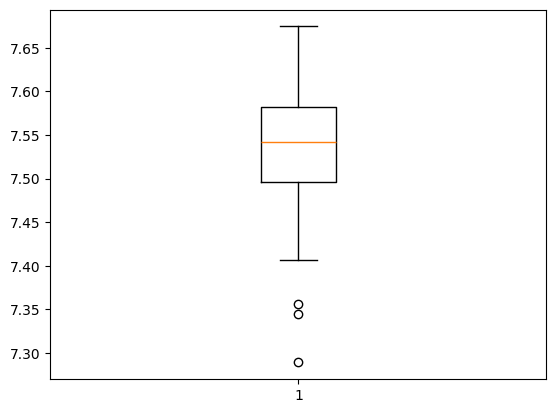

In [55]:
plt.boxplot(pr)

In [56]:
import pandas as pd
print(f"n = {n}, trace_out = {len(trace_out_index)}")
pd.DataFrame(pr).describe()[0][1:]

n = 7, trace_out = 3


mean    7.535997
std     0.071645
min     7.288864
25%     7.495796
50%     7.541543
75%     7.582233
max     7.674643
Name: 0, dtype: float64

In [ ]:
#### taken from a matrix U:
# n = 7, trace_out = 3
# mean    7.535997
# std     0.071645
# min     7.288864
# 25%     7.495796
# 50%     7.541543
# 75%     7.582233
# max     7.674643
# Name: 0, dtype: float64

# Haaar


In [ ]:
rho, rho_delta = model.generate_mixed(delta=0)
purity_mixed = np.trace(rho @ rho)
participation_ratio_mixed = 1 / purity_mixed
print("Participation Ratio Mixed:", np.real(participation_ratio_mixed))

Participation Ratio Mixed: 1.0001193421284886


In [ ]:
rho

array([[0.02699745+1.45438649e-20j, 0.02349061-2.43702610e-03j,
        0.02485671+4.20757027e-04j, ..., 0.01691437+6.15203578e-04j,
        0.01786892+3.09724792e-03j, 0.01559426+1.50132272e-03j],
       [0.02349061+2.43702610e-03j, 0.02065928-1.18931745e-19j,
        0.02158996+2.60988712e-03j, ..., 0.01466175+2.06213118e-03j,
        0.01526825+4.30793538e-03j, 0.01343312+2.71398230e-03j],
       [0.02485671-4.20757027e-04j, 0.02158996-2.60988712e-03j,
        0.02289228-1.82565166e-19j, ..., 0.01558275+3.02809819e-04j,
        0.01650029+2.57316622e-03j, 0.01438112+1.13923914e-03j],
       ...,
       [0.01691437-6.15203578e-04j, 0.01466175-2.06213118e-03j,
        0.01558275-3.02809819e-04j, ..., 0.01061358+8.57220503e-20j,
        0.01126833+1.53364071e-03j, 0.00980651+5.85384033e-04j],
       [0.01786892-3.09724792e-03j, 0.01526825-4.30793538e-03j,
        0.01650029-2.57316622e-03j, ..., 0.01126833-1.53364071e-03j,
        0.01218507-4.01040176e-20j, 0.01049606-7.95525018e-04j]

# Test loop for participation ratios

In [ ]:

N = 10
n = 7
##########
a_x=1
h_z=0.1
delta=0.01
m=1
###########

ket = qutip.rand_unitary(2**N)[randint(0, N-1),:]
rho = np.outer(ket, np.conj(ket))
v = helper_functions.trace_out(
    rho= rho,
    trace_out_index= trace_out_index)# it returns a matrix

derivative_delta=None

model = density_generator.IsingQuantumState(
        n=n, a_x=a_x, h_z=h_z, trace_out_index=trace_out_index, initial_state=v, DEBUG=False)

rho = model.generate_density_matrix()
purity = np.trace(rho @ rho)
participation_ratio = 1 / purity

ValueError: Invalid initial state shape: (512, 512)

In [ ]:
N = 100
for trace_out_index in [[0], [1], [3], [0,1], [0,3], [3,4],[0,1,2], [0,4,8], [2,4,6]]:
    for initial_state in ["0", "H"]: 
        pr = np.zeros(N)
        for i in range(N): 
            n= 6 + len(trace_out_index)
            a_x=1
            h_z= np.random.rand()
            if i == 0:
                DEBUG=True
                print(f"starting simulation with n={n}")
            else:
                DEBUG=False
            model = density_generator.IsingQuantumState(
                    n=n, a_x=a_x, h_z=h_z, trace_out_index=trace_out_index, initial_state=initial_state, DEBUG=DEBUG
                )
            rho, rho_delta = model.generate_mixed(delta=0)
            purity_mixed = np.trace(rho @ rho)
            participation_ratio_mixed = np.real(1 / purity_mixed)
            pr[i] = participation_ratio_mixed
        print(f"n = {n}, trace_out = {trace_out_index}")
        print(f"initial state = {initial_state}")
        print(pd.DataFrame(pr).describe()[0].iloc[[1,2,3,-1]].to_string())
        
        

starting simulation with n=7
Initial state: |0...0>


n = 7, trace_out = [0]
initial state = 0
mean    1.847899
std     0.111177
min     1.610152
max     1.999926
starting simulation with n=7
Initial state: Hadamard state
n = 7, trace_out = [0]
initial state = H
mean    1.093590
std     0.130715
min     1.000000
max     1.438790
starting simulation with n=7
Initial state: |0...0>
n = 7, trace_out = [1]
initial state = 0
mean    1.748564
std     0.165356
min     1.432821
max     1.941702
starting simulation with n=7
Initial state: Hadamard state
n = 7, trace_out = [1]
initial state = H
mean    1.157523
std     0.165441
min     1.000000
max     1.519151
starting simulation with n=7
Initial state: |0...0>
n = 7, trace_out = [3]
initial state = 0
mean    1.818545
std     0.114858
min     1.569649
max     1.941715
starting simulation with n=7
Initial state: Hadamard state
n = 7, trace_out = [3]
initial state = H
mean    1.117640
std     0.140639
min     1.000000
max     1.441022
starting simulation with n=8
Initial state: |0...0>
n = 8, trace_

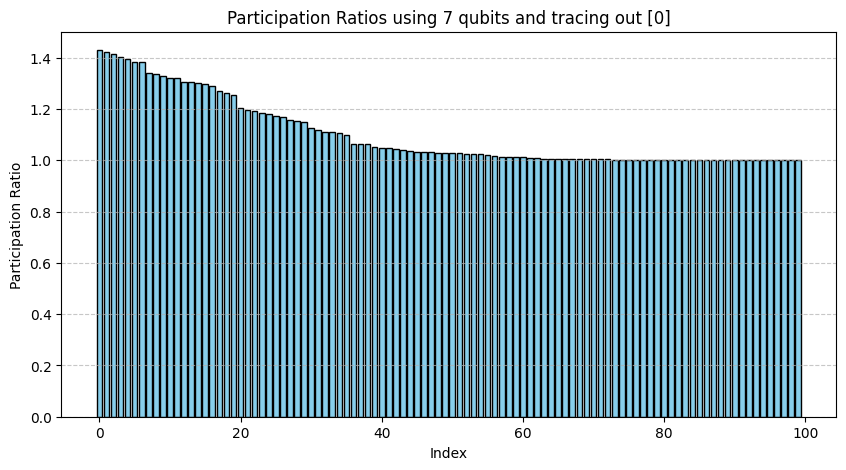

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(len(pr)), np.sort(pr)[::-1], color='skyblue', edgecolor='black')
plt.xlabel('Index')
plt.ylabel('Participation Ratio')
plt.title(f'Participation Ratios using {n} qubits and tracing out {trace_out_index}')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import pandas as pd
print(f"n = {n}, trace_out = {trace_out_index}")
print(f"initial state = {initial_state}")
pd.DataFrame(pr).describe()[0][1:]

n = 7, trace_out = [0]
initial state = 0


mean    1.100878
std     0.132848
min     1.000000
25%     1.002676
50%     1.028567
75%     1.174991
max     1.429560
Name: 0, dtype: float64

In [ ]:
### Initial State: |00...00>

# n = 7, trace_out = [0]
# mean    1.100878
# std     0.132848
# min     1.000000
# 25%     1.002676
# 50%     1.028567
# 75%     1.174991
# max     1.429560

# n = 7, trace_out = [3]
# mean    1.135951
# std     0.146678
# min     1.000000
# 25%     1.009859
# 50%     1.082022
# 75%     1.242946
# max     1.444121



# n = 8, trace_out = [3, 4]
# mean	2.672627
# std	0.207467
# min	2.204517
# 25%	2.556989
# 50%	2.711379
# 75%	2.851802
# max	2.906242


# initial state H
# mean    1.121885
# std     0.133401
# min     1.000000
# 25%     1.009676
# 50%     1.075430
# 75%     1.197070
# max     1.441204

In [ ]:
import numpy as np

n = 2 # Number of qubits
dim = 2**n

# Create full superposition state
ket_plus_n = np.ones(dim, dtype=complex) / np.sqrt(dim)

```
starting simulation with n=7, a_x=1
Initial state: |0...0>
n = 7, trace_out = [0]
initial state = 0
mean    1.843195
std     0.128271
min     1.630669
max     1.999823
starting simulation with n=7, a_x=1
Initial state: Hadamard state
n = 7, trace_out = [0]
initial state = H
mean    1.130890
std     0.153456
min     1.000699
max     1.415473
starting simulation with n=7, a_x=1
Initial state: |0...0>
n = 7, trace_out = [1]
initial state = 0
mean    1.698045
std     0.199671
min     1.442247
max     1.940088
starting simulation with n=7, a_x=1
Initial state: Hadamard state
n = 7, trace_out = [1]
initial state = H
mean    1.074240
std     0.087565
min     1.000004
max     1.283056
starting simulation with n=7, a_x=1
Initial state: |0...0>
n = 7, trace_out = [3]
initial state = 0
mean    1.801866
std     0.140048
min     1.564258
max     1.939320
starting simulation with n=7, a_x=1
Initial state: Hadamard state
n = 7, trace_out = [3]
initial state = H
mean    1.126916
std     0.169641
min     1.000000
max     1.442152
starting simulation with n=8, a_x=1
Initial state: |0...0>
n = 8, trace_out = [0, 1]
initial state = 0
mean    1.864193
std     0.136006
min     1.704774
max     2.027431
starting simulation with n=8, a_x=1
Initial state: Hadamard state
n = 8, trace_out = [0, 1]
initial state = H
mean    1.116531
std     0.095642
min     1.000035
max     1.234871
starting simulation with n=8, a_x=1
Initial state: |0...0>
n = 8, trace_out = [0, 3]
initial state = 0
mean    3.074710
std     0.459084
min     2.242458
max     3.507650
starting simulation with n=8, a_x=1
Initial state: Hadamard state
n = 8, trace_out = [0, 3]
initial state = H
mean    1.210555
std     0.315920
min     1.000068
max     2.019612
starting simulation with n=8, a_x=1
Initial state: |0...0>
n = 8, trace_out = [3, 4]
initial state = 0
mean    2.520965
std     0.282369
min     2.186249
max     2.881489
starting simulation with n=8, a_x=1
Initial state: Hadamard state
n = 8, trace_out = [3, 4]
initial state = H
mean    1.179927
std     0.180738
min     1.002716
max     1.495863
```

mean    1.179927
std     0.180738
min     1.002716
max     1.495863
